# Import and warehouse data:

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(r"C:\Users\selvakumarp\Downloads\03_EnsembleTechniques\SQL_DatabaseEST.db")
df1 = con.execute("SELECT * From 'TelcomCustomer-Churn_1'")
cols = [column[0] for column in df1.description]
results1= pd.DataFrame.from_records(data = df1.fetchall(), columns = cols)

df2 = con.execute("SELECT * From 'TelcomCustomer-Churn_2'")
cols = [column[0] for column in df2.description]
results2= pd.DataFrame.from_records(data = df2.fetchall(), columns = cols)

result = pd.concat([results1,results2],axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
result.shape

(7043, 21)

MySQL is not able to install in my computer, hence i have used SQLite which is similar to MySQL.

In [3]:
df = pd.read_csv('TelcomCustomer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

TotalCharges is supposed to be a numerical value (float). Need to verified the datatype of "TotalCharges"

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the above observation, No null values are available in the given dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Eventhough there is no null values present, still "TotalCharges" observed as "object".It is supposed to be numerical(float). Need to check for empty values or not.

# Data cleansing

In [7]:
def datacleansing(df):
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    df.isnull().sum()
    df = df.dropna()
    df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)
    return df    

In [8]:
df = datacleansing(df)

Empty values are detected and replaced with "NaN". Observed "11" Null values are dropped, "TotalCharges" is updated to numerical, After dropping the null values, now data contains -7032 rows and 21 coulumns.

Data cleansing step is performed by the function defined above.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Now, in the given data, all the variables are updated with concern data types.

In [10]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

To perform the variate analysis, the categorical features are converted into dummy variables , as we can only calculate correlation for numeric features. "Customer ID" is not considering for converting as it may have too many unique instances.

# Data analysis & visualisation:

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [12]:
# identify outliers for 'tenure'

q25, q75 = np.percentile(df['tenure'], 25), np.percentile(df['tenure'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['tenure'] if x < lower or x > upper]
print('Identified outliers for tenure out of 7032 records: %d' % len(outliers))

Identified outliers for tenure out of 7032 records: 0


In [13]:
# identify outliers for 'MonthlyCharges'

q25, q75 = np.percentile(df['MonthlyCharges'], 25), np.percentile(df['MonthlyCharges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['MonthlyCharges'] if x < lower or x > upper]
print('Identified outliers for MonthlyCharges out of 7032 records: %d' % len(outliers))

Identified outliers for MonthlyCharges out of 7032 records: 0


In [14]:
# identify outliers for 'TotalCharges'

q25, q75 = np.percentile(df['TotalCharges'], 25), np.percentile(df['TotalCharges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['TotalCharges'] if x < lower or x > upper]
print('Identified outliers for TotalCharges out of 7032 records: %d' % len(outliers))

Identified outliers for TotalCharges out of 7032 records: 0


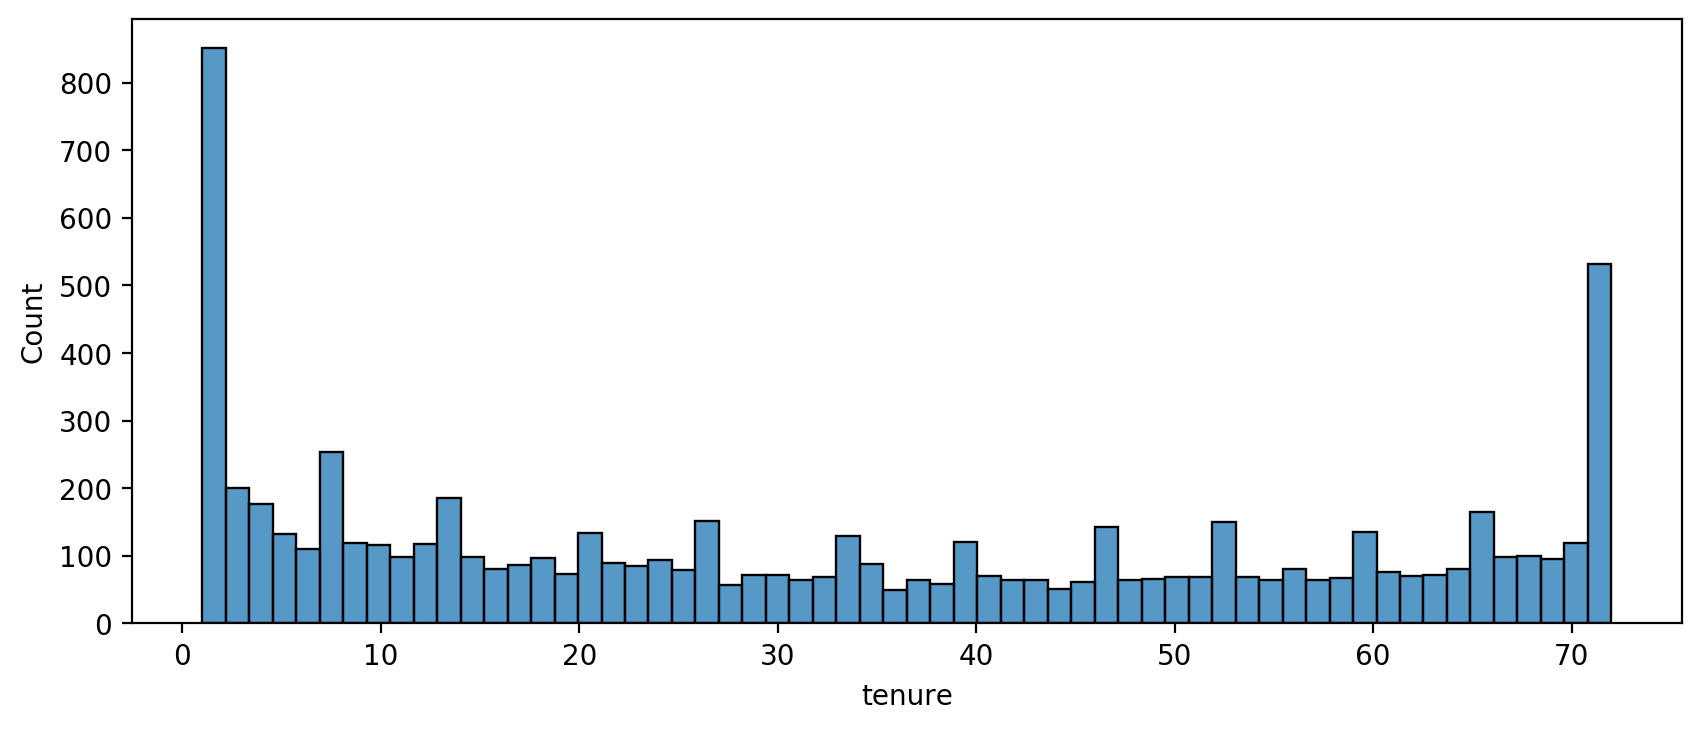

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

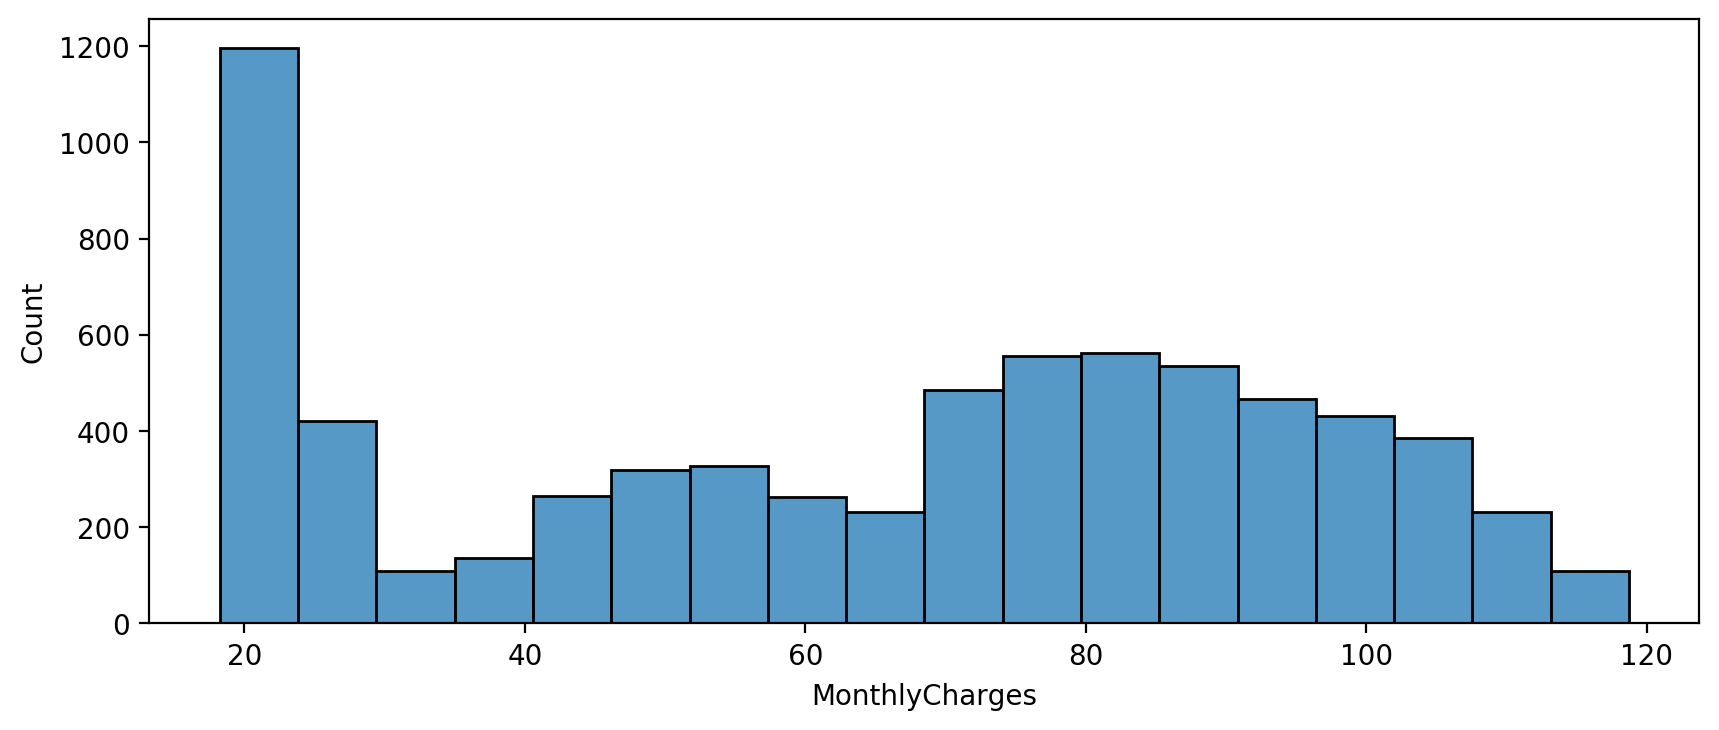

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(df['MonthlyCharges'])

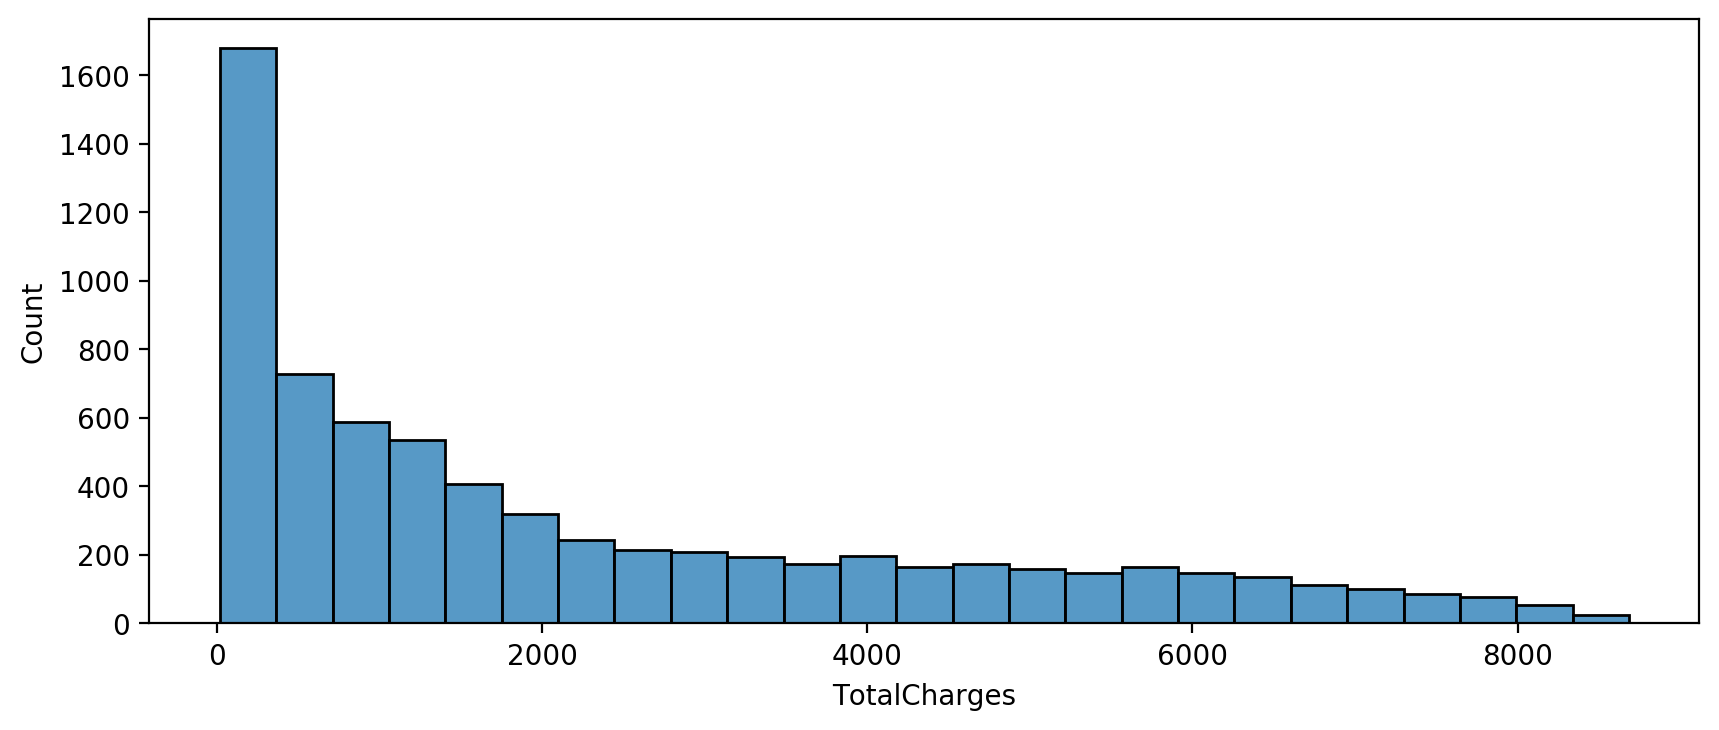

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(df['TotalCharges'])

From the univariate analysis, the numerical variables are NOT normally distributed. "Total charges" count will be considered.
Distribution of 'tenure' column, which is the amount of months a customer was there

No     5163
Yes    1869
Name: Churn, dtype: int64

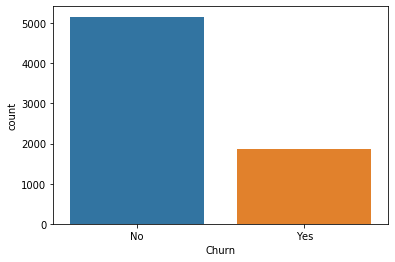

In [18]:
sns.countplot(data=df,x='Churn')
df.loc[:,'Churn'].value_counts()

It is observed that Churn-No (5163 customers ), Churn-Yes (1869 customers ) in the given dataset.

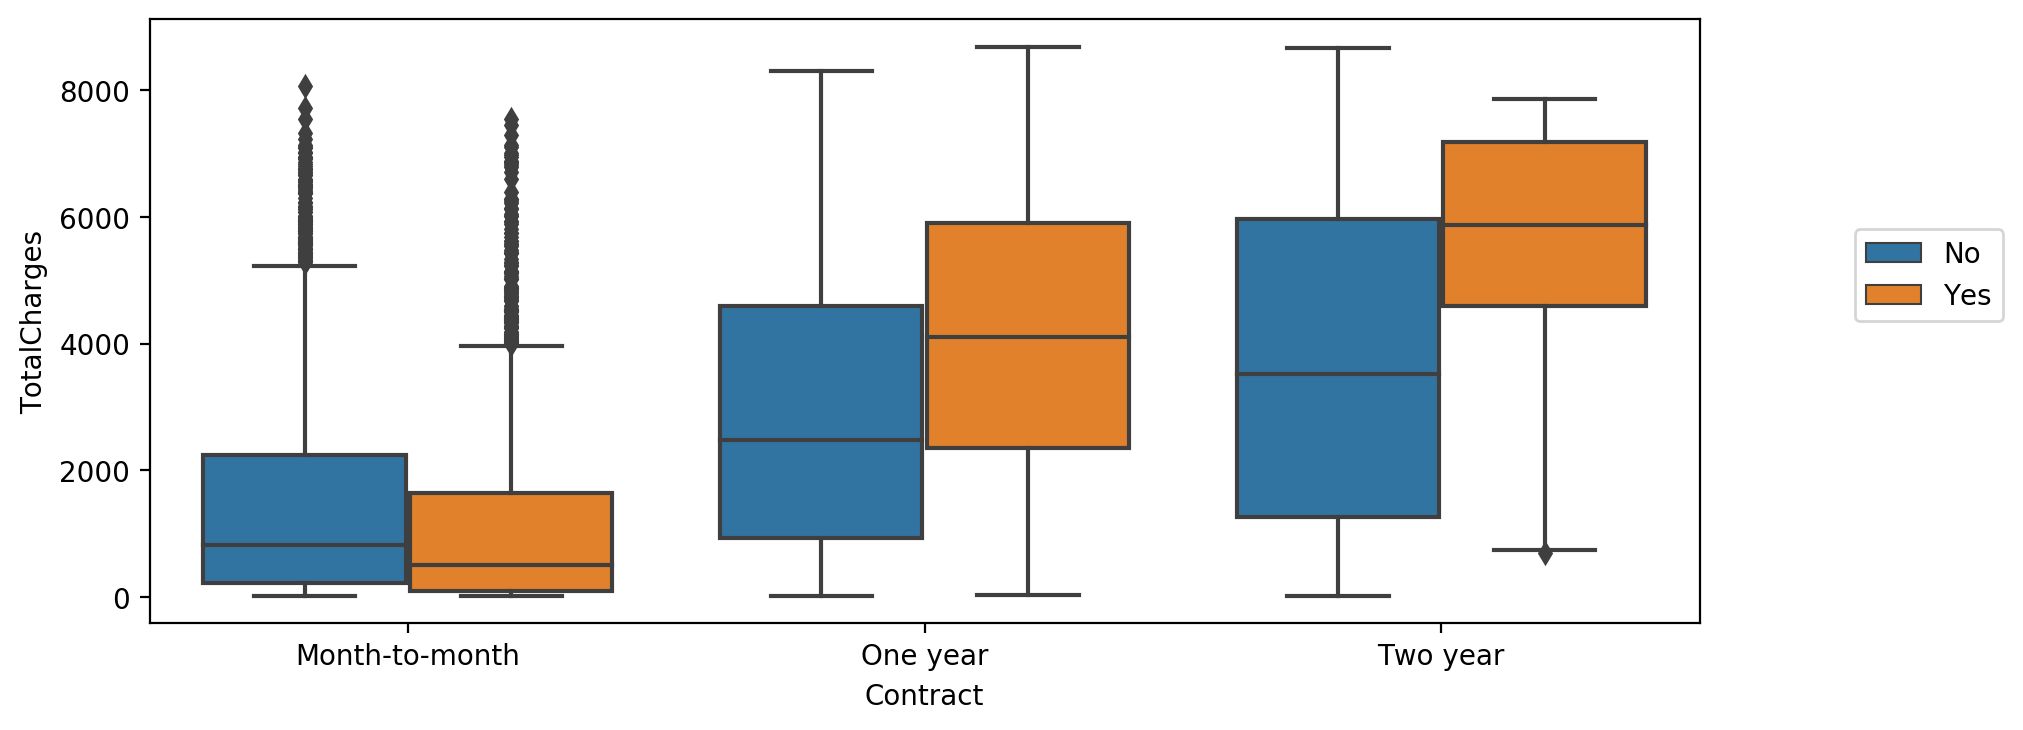

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

From the above Boxplot visualisation, outliers are observed on the Month-to-Month contract for the total charges

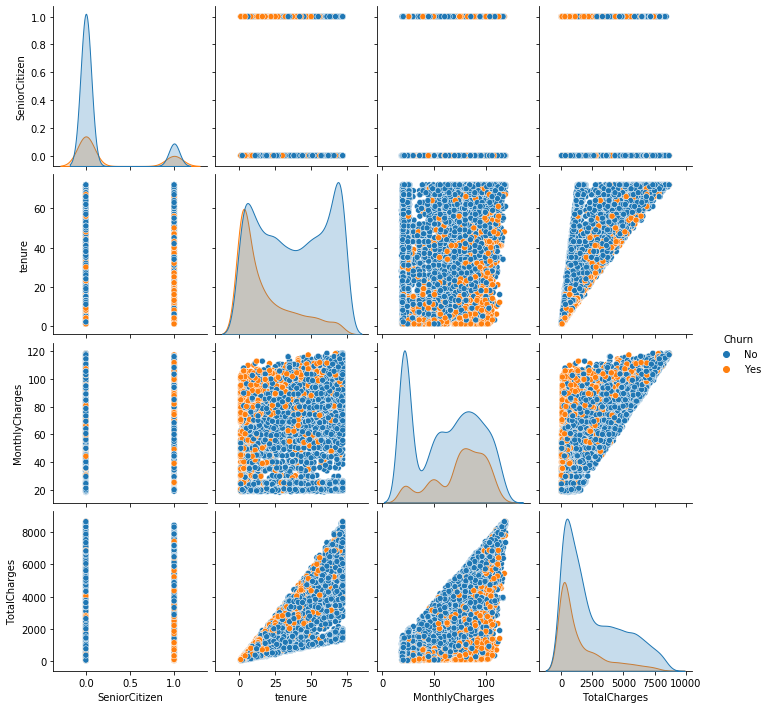

In [20]:
sns.pairplot(df,hue='Churn')

From the above pair plot, high monthly charges leads to more churn-yes

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [23]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

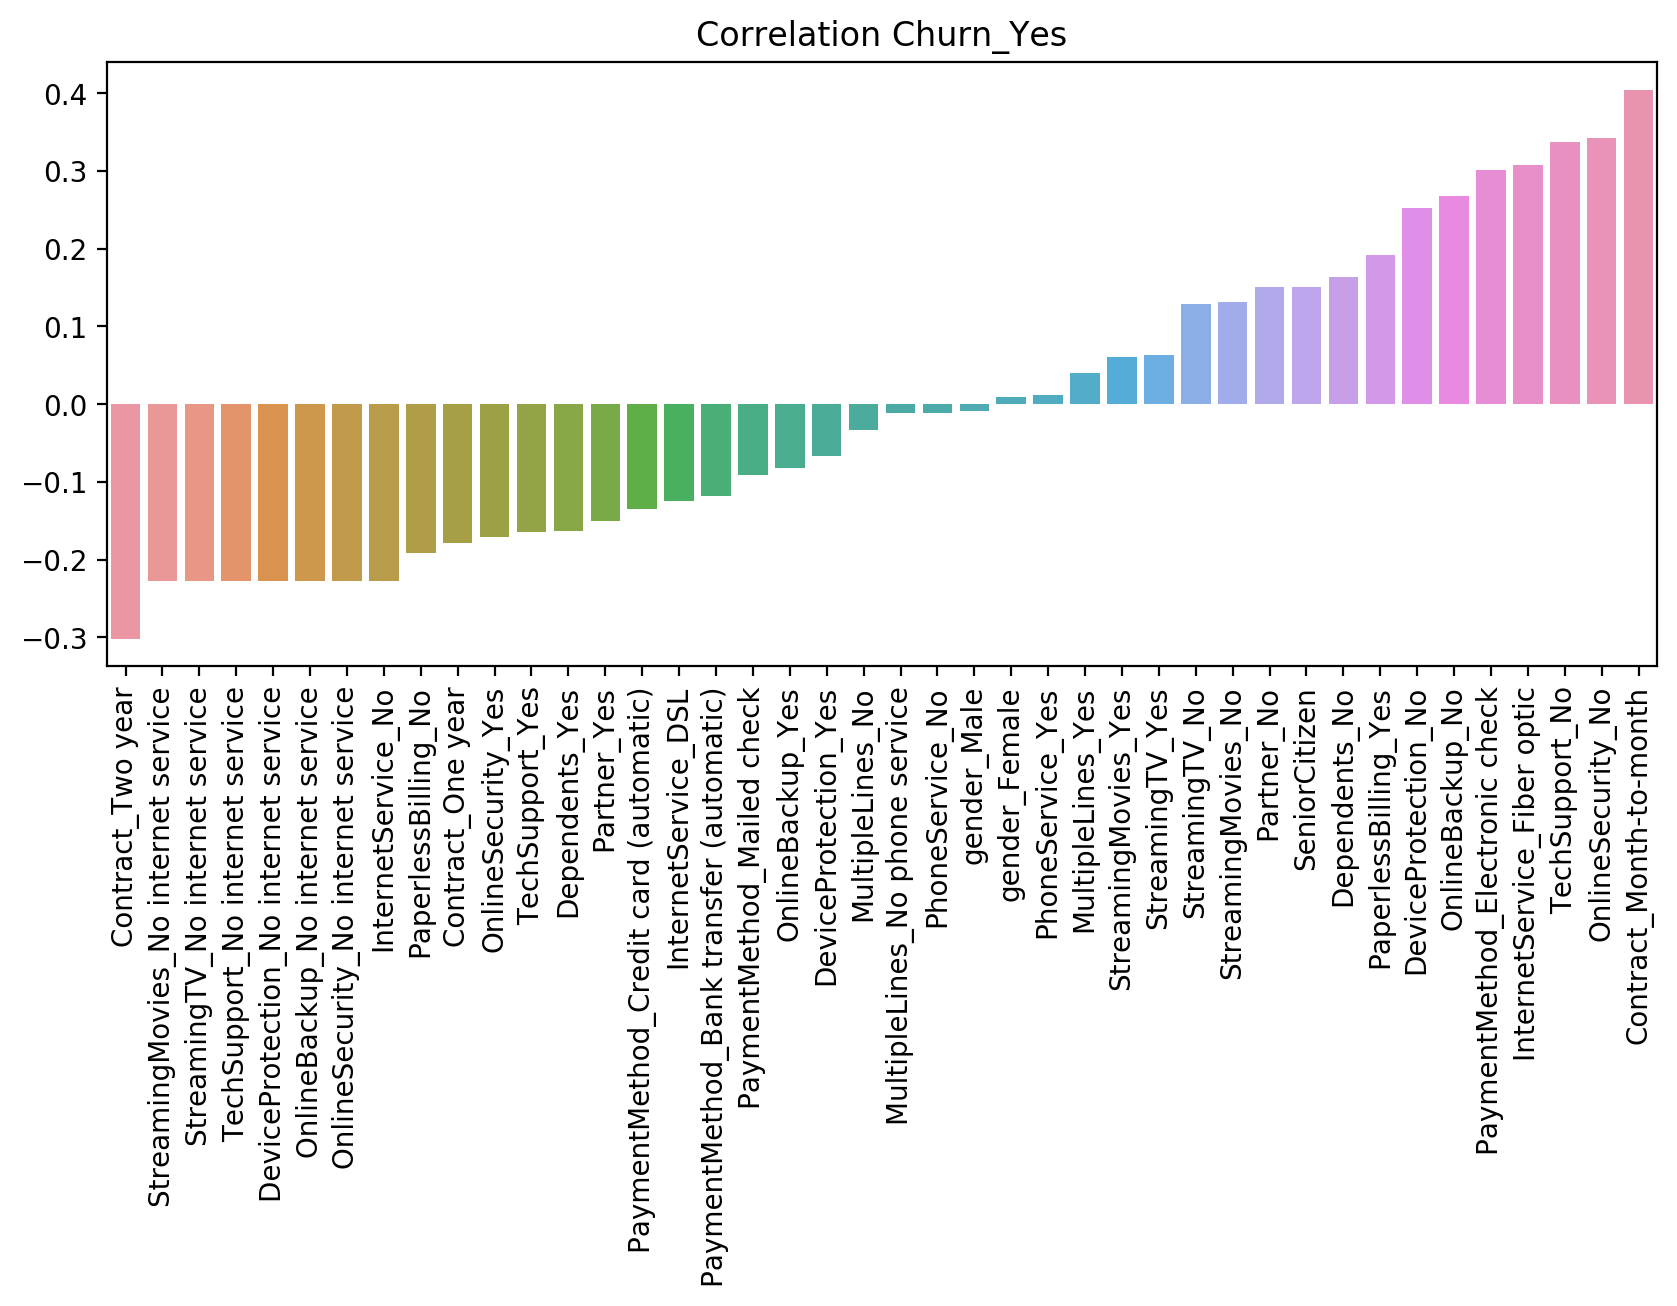

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Correlation Churn_Yes")
plt.xticks(rotation=90);

From the above observation, the contract plays one of the vital role in the churn-yes. Hence we will focus on the customer segments with respect to "Contract".

In [25]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

From the above observation, there are three types of contracts are available in the given data set.

From the univariate analysis, tenure is the amount of months a customer was there.
It is understood by the histplots separated with Churn and Contract.

<Figure size 2000x600 with 0 Axes>

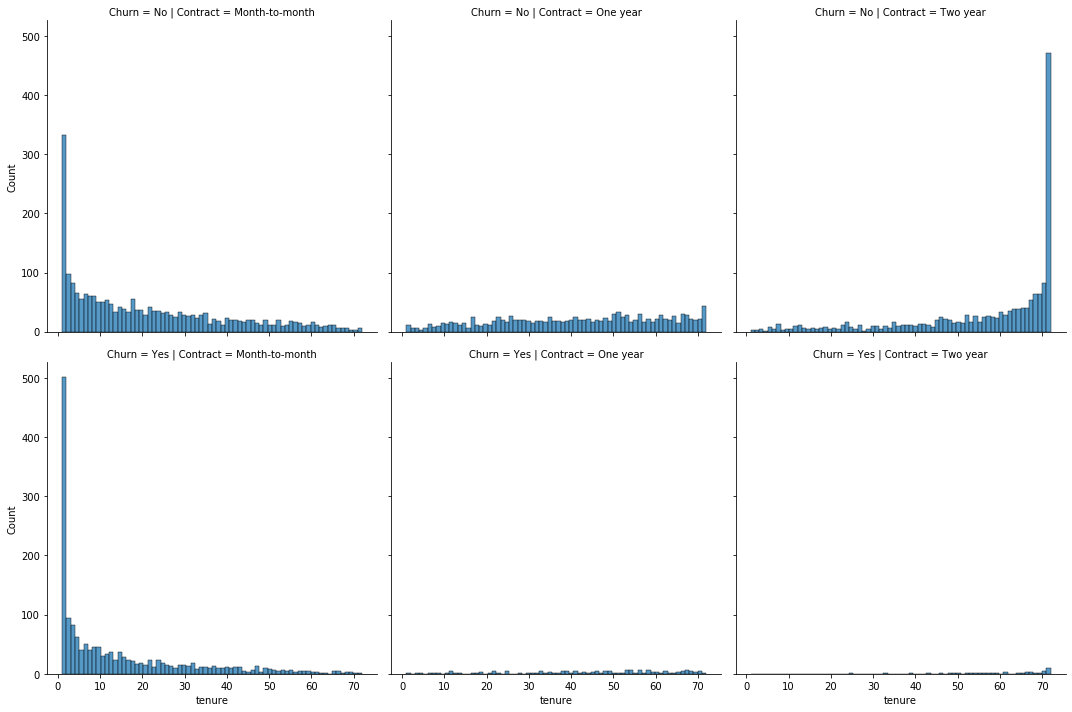

In [26]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

From the observation, the churn rate is more for initial month tenure.

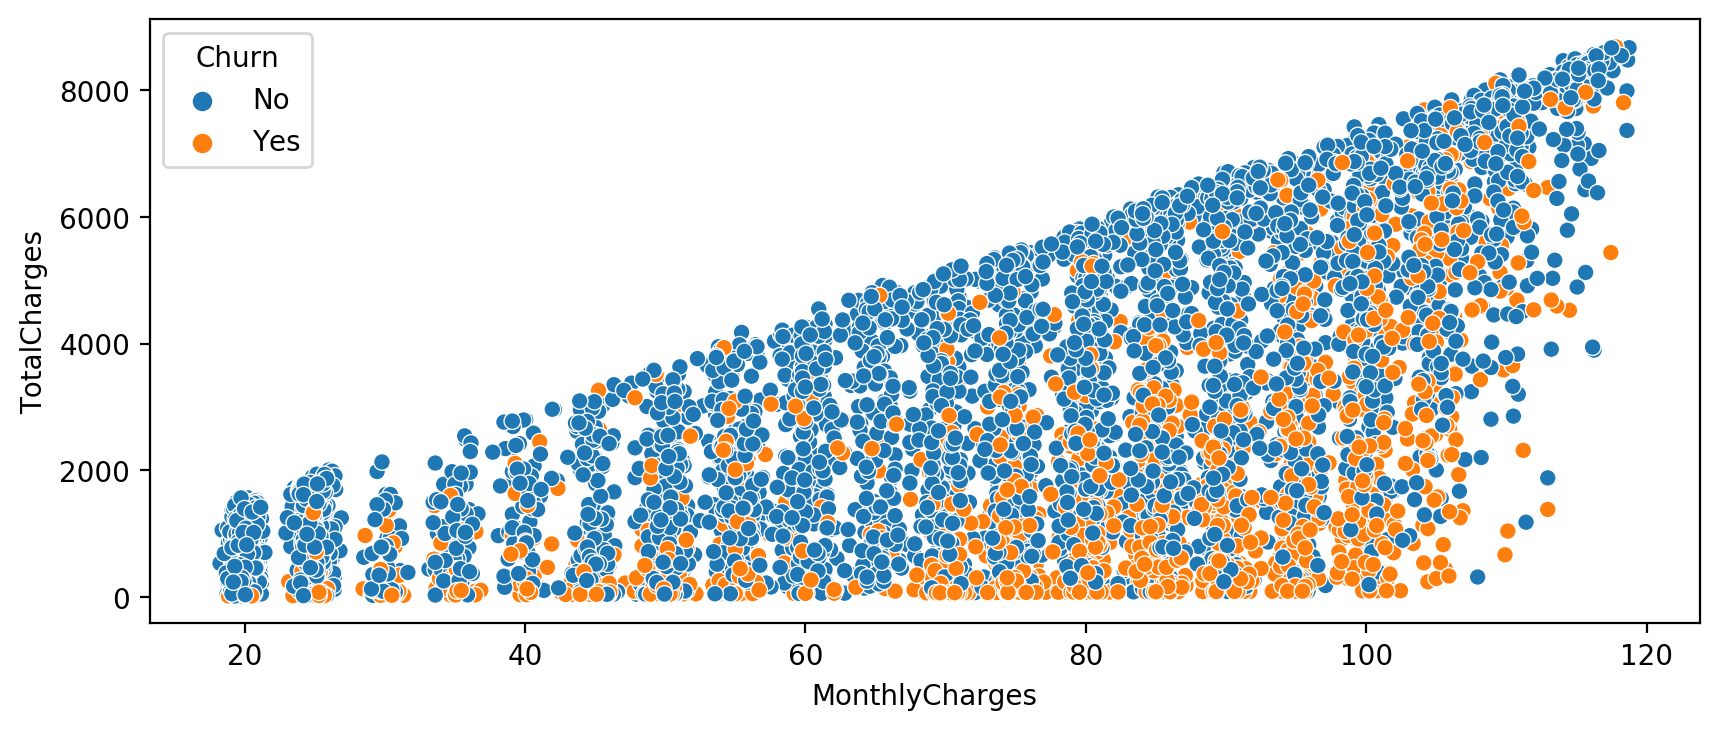

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')

From the observartion, if the monthly charges increase, the churn rate is also increase

If we breakdown the tenure period futher, it may help us to understand the churn rate better.

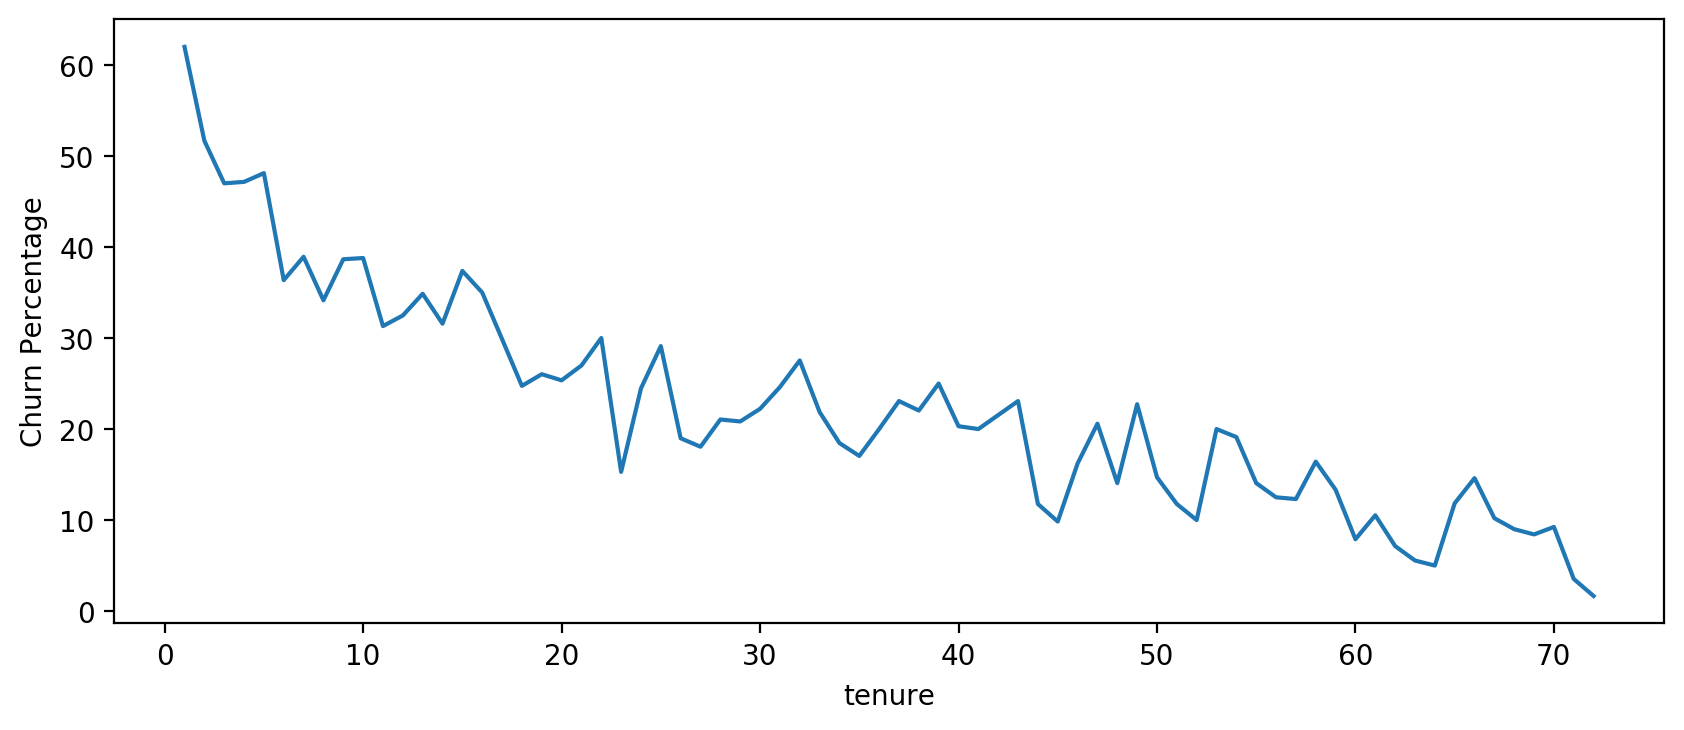

In [28]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

Before break down the tenure period, the churn rate is calculated by grouping the churn-yes and churn-no with respect to the tenure range from 1-72 months. It is clearly indicates that churn rate is more in the initial months, if it is extended then churn rate is less.

# Data pre-processing

In [29]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [30]:
X.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


It is understand that due to 'get_dummies' 30 number of variables are observed in the data.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4922, 30)

(2110, 30)

(4922,)

(2110,)

The datas are splited 30% for testing data and 70% for training data. 4922 + 2110 = 7032

In [33]:
X_train.describe()#Train data statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.00000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.157863,32.290735,64.900904,2276.188988,0.50061,0.483543,0.296424,0.902885,0.097115,0.421577,...,0.216172,0.386631,0.216172,0.390492,0.205404,0.238724,0.593052,0.210077,0.342950,0.223080
std,0.364649,24.472932,30.172979,2271.793756,0.50005,0.499780,0.456727,0.296144,0.296144,0.493862,...,0.411675,0.487027,0.411675,0.487910,0.404038,0.426347,0.491315,0.407405,0.474743,0.416354
min,0.000000,1.000000,18.550000,18.850000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.450000,408.312500,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.450000,1382.350000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.050000,3752.687500,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_test.describe()##Test data statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,...,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,0.172986,32.727488,64.558649,2299.889336,0.514218,0.480095,0.303318,0.904265,0.095735,0.422749,...,0.216114,0.379147,0.216114,0.383412,0.218483,0.241706,0.591943,0.230806,0.320853,0.239810
std,0.378325,24.716278,29.887785,2255.461886,0.499916,0.499722,0.459800,0.294297,0.294297,0.494113,...,0.411690,0.485290,0.411690,0.486333,0.413315,0.428219,0.491590,0.421448,0.466915,0.427069
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.825000,381.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.200000,1429.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.700000,3888.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.350000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.describe()##Original data statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The check has been made to make sure that train, test and original data are having the similar statistical characterstics.

In [36]:
y_train.value_counts()

No     3583
Yes    1339
Name: Churn, dtype: int64

The data in the target variable are not balanced. Hence SMOTE is used for target data balancing.

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
y_train_res.value_counts()

No     3583
Yes    3583
Name: Churn, dtype: int64

Now the target data is balanced.

# Model training, testing and tuning:

In [38]:
model_score_list = []

In [39]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    return acc_score

# DecisionTreeClassifier

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

# DecisionTreeClassifier model with Default parameters

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds = dt.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [42]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.83      0.79      0.81      1580
         Yes       0.45      0.51      0.48       530

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.73      0.72      0.73      2110



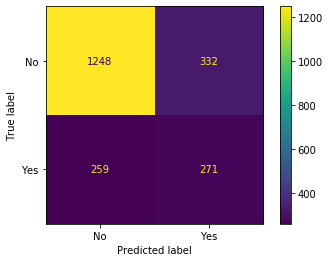

In [43]:
plot_confusion_matrix(dt,X_test,y_test)

In [44]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9981714750101585
0.7199052132701422


Even though, the decision tree classifier is not belongs to ensemble. The model is built with decision tree classifier for the understanding.

The output for training data is more accuracy, but too much deviated from the testing data result. Hence it is concluded that model is overfit.

# Optimize the parameters using GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV
param_griddt = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_griddt, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [46]:
CV_dt.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

The parameters are optimize using GridSearchCV. The best parameters from the GridSearchCV output is used for the better model performance.

# DecisionTreeClassifier model with optimized parameters

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features='auto')
dt1.fit(X_train,y_train)
preds1 = dt1.predict(X_test)
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1580
         Yes       0.65      0.42      0.51       530

    accuracy                           0.80      2110
   macro avg       0.74      0.67      0.69      2110
weighted avg       0.78      0.80      0.78      2110



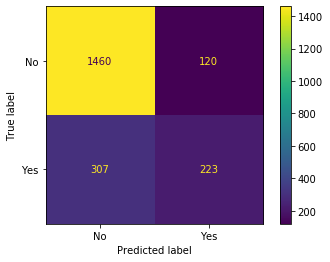

In [48]:
plot_confusion_matrix(dt1,X_test,y_test)

In [49]:
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))
acc_score = evaluate_model(y_test, preds1)
model_score_list.append({'model_name':'DecisionTreeClassifier','acc_score':acc_score})

0.7927671678179602
0.7976303317535545
Accuracy Score :  79.76


The model with optimize parameters given the training and testing data are similar. The overfit is removed.

# DecisionTreeClassifier model with Target Balanced Data

In [50]:
dtsm = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features='auto')
dtsm.fit(X_train_res,y_train_res)
predssm = dtsm.predict(X_test)
print(classification_report(y_test,predssm))

              precision    recall  f1-score   support

          No       0.85      0.80      0.83      1580
         Yes       0.50      0.59      0.54       530

    accuracy                           0.75      2110
   macro avg       0.68      0.70      0.68      2110
weighted avg       0.76      0.75      0.75      2110



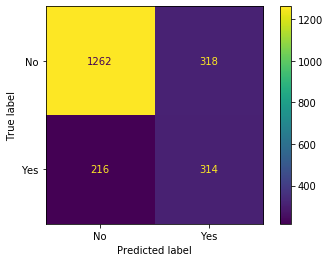

In [51]:
plot_confusion_matrix(dtsm,X_test,y_test)

In [52]:
print(dtsm.score(X_train_res, y_train_res))
print(dtsm.score(X_test, y_test))

0.7795143734300866
0.7469194312796209


The model with target balance is not helping. The results without target balance data is better compared to model with target balance data.

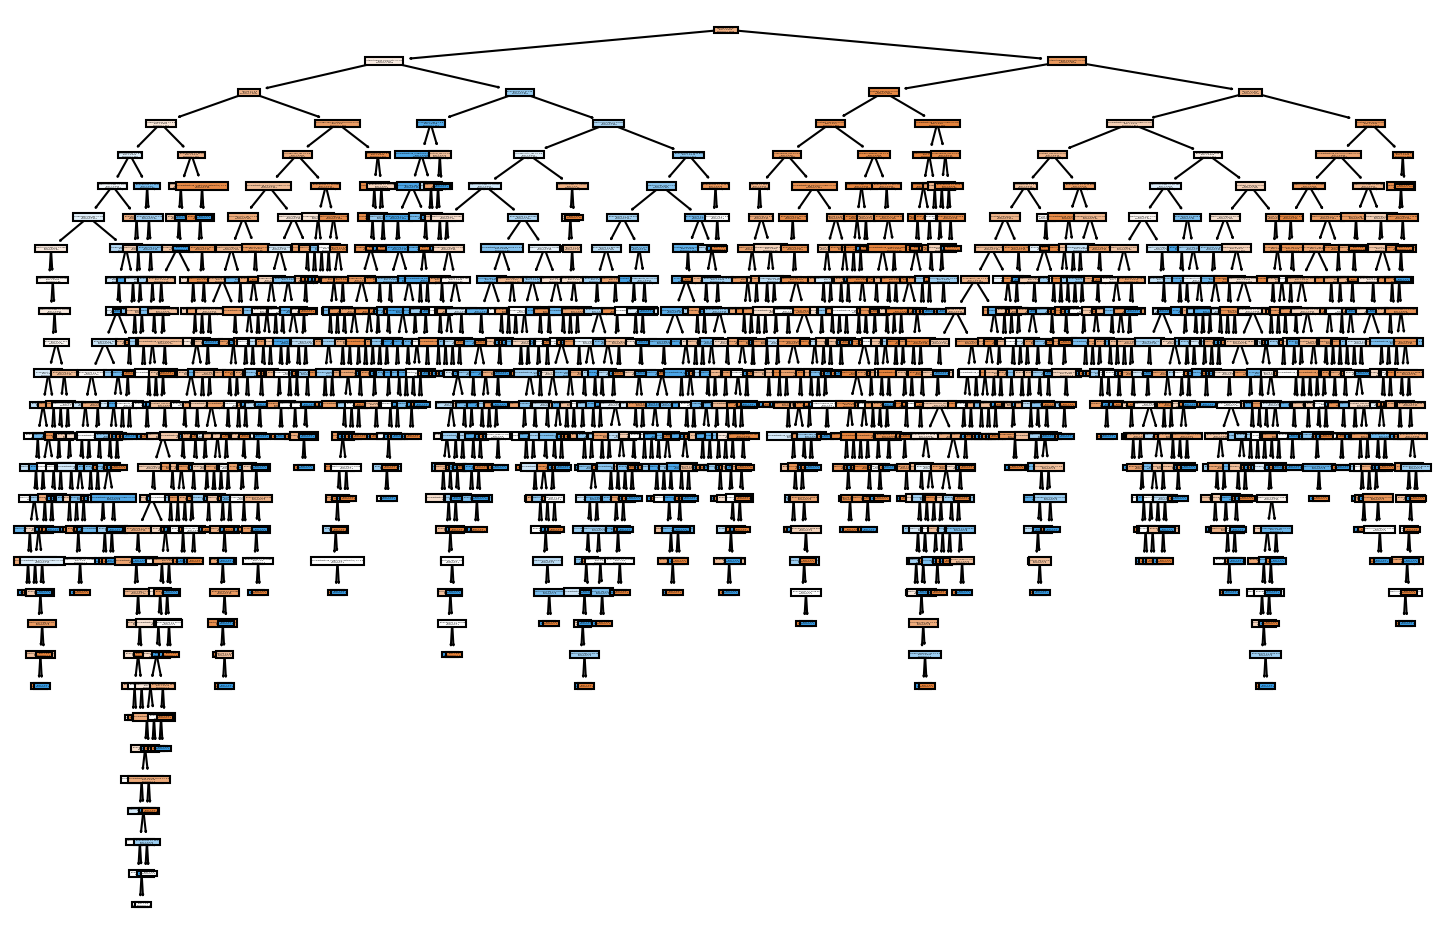

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

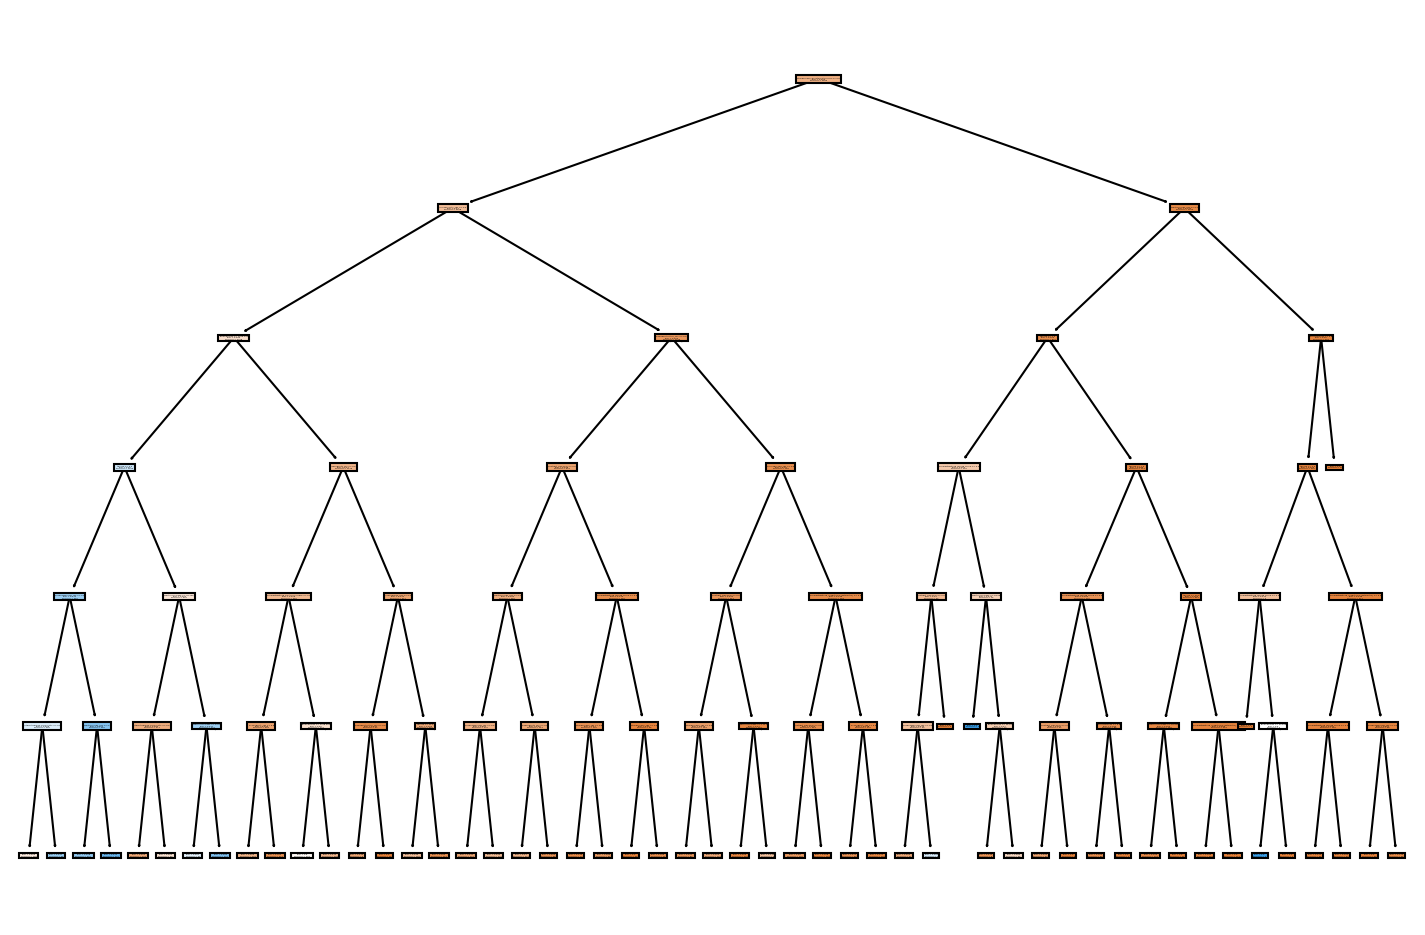

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt1,filled=True,feature_names=X.columns);

# BaggingClassifier

# BaggingClassifier with default parameters

BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [55]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()
bgcl = bgcl.fit(X_train, y_train)

In [56]:
predsbc = bgcl.predict(X_test)
print(classification_report(y_test,predsbc))

              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1580
         Yes       0.57      0.46      0.51       530

    accuracy                           0.78      2110
   macro avg       0.70      0.67      0.68      2110
weighted avg       0.77      0.78      0.77      2110



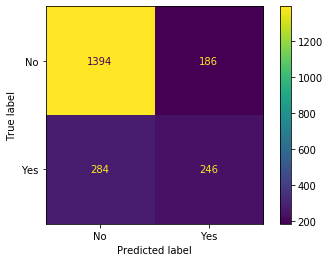

In [57]:
plot_confusion_matrix(bgcl,X_test,y_test)

In [58]:
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.9798862251117432
0.7772511848341233


The output for training data is more accuracy, but too much deviated from the testing data result. Hence it is concluded that model is overfit.

# Optimize the parameters using GridSearch

In [59]:
from sklearn.model_selection import GridSearchCV
param_gridbc = { 
    'n_estimators': [50, 100,200],
}
CV_bc = GridSearchCV(estimator=bgcl, param_grid=param_gridbc, cv= 5)
CV_bc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [60]:
CV_bc.best_params_

{'n_estimators': 100}

The parameters are optimize using GridSearchCV. The best parameters from the GridSearchCV output is used for the better model performance.

# BaggingClassifier model with base estimator as DecisionTree model and optimized estimators

In [61]:
bgclbe = BaggingClassifier(base_estimator=dt1,n_estimators=50,random_state=1)
bgclbe = bgclbe.fit(X_train, y_train)
predsbe = bgclbe.predict(X_test)
print(classification_report(y_test,predsbe))

              precision    recall  f1-score   support

          No       0.84      0.92      0.87      1580
         Yes       0.65      0.47      0.54       530

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



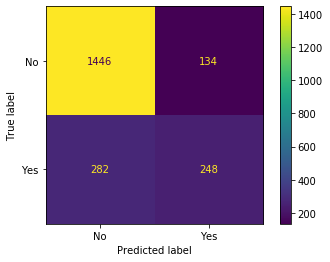

In [62]:
plot_confusion_matrix(bgclbe,X_test,y_test)

In [63]:
print(bgclbe.score(X_train, y_train))
print(bgclbe.score(X_test, y_test))
acc_score = evaluate_model(y_test, predsbe)
model_score_list.append({'model_name':'BaggingClassifier','acc_score':acc_score})

0.8057700121901666
0.8028436018957346
Accuracy Score :  80.28


The model with optimize parameters given the training and testing data are similar. The overfit is removed.

# BaggingClassifier model with Target Balanced Data

In [64]:
bgclsm = BaggingClassifier(base_estimator=dt1,n_estimators=200,random_state=1)
bgclsm = bgclbe.fit(X_train_res, y_train_res)
predssm = bgclsm.predict(X_test)
print(classification_report(y_test,predssm))

              precision    recall  f1-score   support

          No       0.90      0.75      0.82      1580
         Yes       0.50      0.75      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



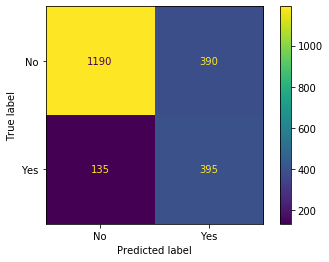

In [65]:
plot_confusion_matrix(bgclsm,X_test,y_test)

In [66]:
print(bgclsm.score(X_train_res, y_train_res))
print(bgclsm.score(X_test, y_test))

0.8293329612056936
0.7511848341232228


The model with target balance is not helping. The results without target balance data is better compared to model with target balance data.

# RandomForestClassifier with default parameters

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predsrf = rf.predict(X_test)
print(classification_report(y_test,predsrf))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.63      0.49      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



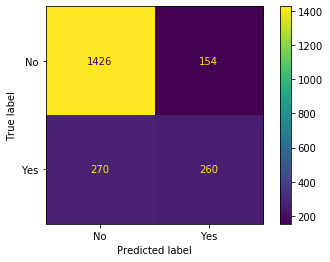

In [68]:
plot_confusion_matrix(rf,X_test,y_test)

In [69]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9981714750101585
0.7990521327014218


The output for training data is more accuracy, but too much deviated from the testing data result. Hence it is concluded that model is overfit.

# Optimize the parameters using GridSearch

In [70]:
from sklearn.model_selection import GridSearchCV
param_gridrf = { 
    'n_estimators': [50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_gridrf, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [71]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

The parameters are optimize using GridSearchCV. The best parameters from the GridSearchCV output is used for the better model performance.

# RandomForestClassifier model with Optimized parameters

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=8,max_features='auto')
rf1.fit(X_train,y_train)
predsrf1 = rf1.predict(X_test)
print(classification_report(y_test,predsrf1))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1580
         Yes       0.65      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



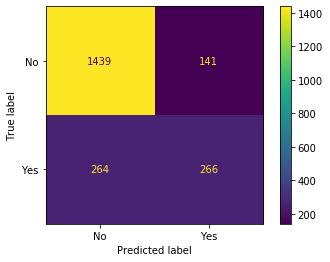

In [73]:
plot_confusion_matrix(rf1,X_test,y_test)

In [74]:
print(rf1.score(X_train, y_train))
print(rf1.score(X_test, y_test))
acc_score = evaluate_model(y_test, predsrf1)
model_score_list.append({'model_name':'RandomForestClassifier','acc_score':acc_score})

0.8293376676147908
0.8080568720379147
Accuracy Score :  80.81


The model with optimize parameters given the training and testing data are similar. The overfit is removed.


# RandomForestClassifie model with Target Balanced Data

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfsm = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=7,max_features='log2')
rfsm.fit(X_train_res,y_train_res)
predsrfsm = rfsm.predict(X_test)
print(classification_report(y_test,predsrfsm))

              precision    recall  f1-score   support

          No       0.89      0.77      0.83      1580
         Yes       0.52      0.73      0.60       530

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



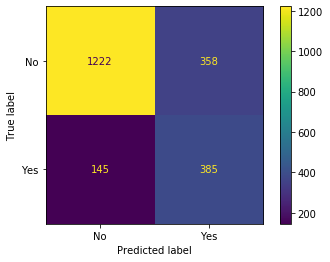

In [76]:
plot_confusion_matrix(rfsm,X_test,y_test)

In [77]:
print(rfsm.score(X_train_res, y_train_res))
print(rfsm.score(X_test, y_test))

0.8360312587217416
0.761611374407583


The model with target balance is not helping. The results without target balance data is better compared to model with target balance data.


# AdaBoostClassifier model with default parameters

AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
predsada = ada.predict(X_test)
print(classification_report(y_test,predsada))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1580
         Yes       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



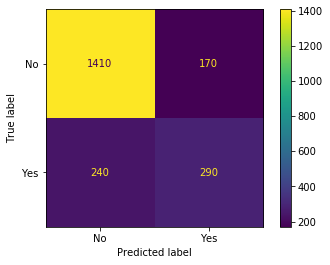

In [79]:
plot_confusion_matrix(ada,X_test,y_test)

In [80]:
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.8088175538399025
0.8056872037914692


The model with default parameters itself given the training and testing data are similar. No overfit is observed.


# Optimize the parameters using GridSearch

In [81]:
from sklearn.model_selection import GridSearchCV
param_gridada = {
     'n_estimators': [50, 100,200],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
CV_ada = GridSearchCV(estimator=ada, param_grid=param_gridada, cv= 5)
CV_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [82]:
CV_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

The parameters are optimize using GridSearchCV. The best parameters from the GridSearchCV output is used for the better model performance.


# AdaBoostClassifier model with optimized parameters

In [83]:
ada1 = AdaBoostClassifier( n_estimators=200, learning_rate=0.1)
ada1.fit(X_train,y_train)
predsada1 = ada1.predict(X_test)
print(classification_report(y_test,predsada1))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.66      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



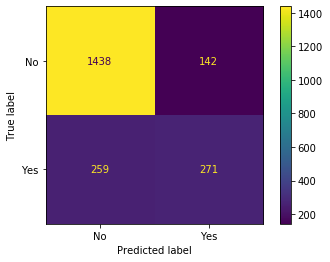

In [84]:
plot_confusion_matrix(ada1,X_test,y_test)

In [85]:
print(ada1.score(X_train, y_train))
print(ada1.score(X_test, y_test))
acc_score = evaluate_model(y_test, predsada1)
model_score_list.append({'model_name':'AdaBoostClassifier','acc_score':acc_score})

0.8045509955302722
0.8099526066350711
Accuracy Score :  81.0


# AdaBoostClassifier model with Target Balanced Data

In [86]:
adasm = AdaBoostClassifier( n_estimators=200, learning_rate=0.1)
adasm.fit(X_train_res,y_train_res)
predsadasm = adasm.predict(X_test)
print(classification_report(y_test,predsadasm))

              precision    recall  f1-score   support

          No       0.89      0.77      0.83      1580
         Yes       0.52      0.72      0.60       530

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.80      0.76      0.77      2110



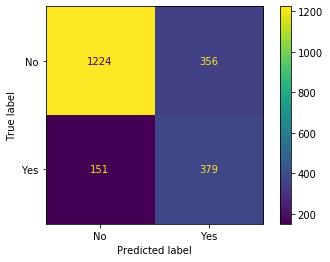

In [87]:
plot_confusion_matrix(adasm,X_test,y_test)

In [88]:
print(adasm.score(X_train_res, y_train_res))
print(adasm.score(X_test, y_test))

0.8212391850404689
0.7597156398104266


The model with target balance is not helping. The results without target balance data is better compared to model with target balance data.


# GradientBoostClassifier

GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [89]:
gbcl = GradientBoostingClassifier()
gbcl.fit(X_train,y_train)
predsgbcl = gbcl.predict(X_test)
print(classification_report(y_test,predsgbcl))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



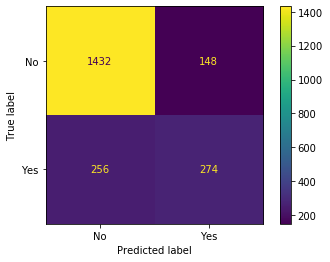

In [90]:
plot_confusion_matrix(gbcl,X_test,y_test)

In [91]:
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.8287281592848436
0.8085308056872038


The model with default parameters itself given the training and testing data are similar. No overfit is observed.


# Optimize the parameters using GridSearch

In [92]:
param_gridgbc = {
     'loss': ['deviance', 'exponential'],
     'n_estimators': [50, 100,200],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
CV_gbc = GridSearchCV(estimator=gbcl, param_grid=param_gridada, cv= 5)
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [93]:
CV_gbc.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

The parameters are optimize using GridSearchCV. The best parameters from the GridSearchCV output is used for the better model performance.


# GradientBoostClassifier model with optimized parameters

In [94]:
gbcl1 = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.05)
gbcl1.fit(X_train,y_train)
predsgbcl1 = gbcl1.predict(X_test)
print(classification_report(y_test,predsgbcl1))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.65      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



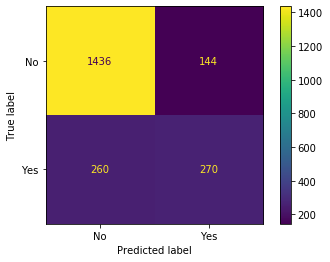

In [95]:
plot_confusion_matrix(gbcl1,X_test,y_test)

In [96]:
print(gbcl1.score(X_train, y_train))
print(gbcl1.score(X_test, y_test))
acc_score = evaluate_model(y_test, predsgbcl1)
model_score_list.append({'model_name':'GradientBoostingClassifier','acc_score':acc_score})

0.8171475010158472
0.8085308056872038
Accuracy Score :  80.85


# GradientBoostClassifier model with Target Balanced Data

In [97]:
gbclsm = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.05)
gbclsm.fit(X_train_res,y_train_res)
predsgbclsm = gbcl1.predict(X_test)
print(classification_report(y_test,predsgbclsm))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.65      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



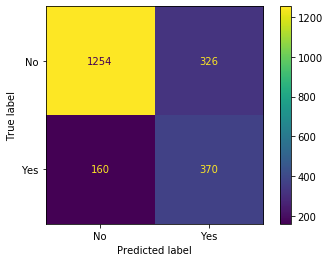

In [98]:
plot_confusion_matrix(gbclsm,X_test,y_test)

In [99]:
print(gbclsm.score(X_train_res, y_train_res))
print(gbclsm.score(X_test, y_test))

0.8396595032096009
0.7696682464454976


The model with target balance is not helping. The results without target balance data is better compared to model with target balance data.


In [100]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score'])
model_score_df.sort_values(['acc_score'], ascending=False)

,model_name,acc_score
3,AdaBoostClassifier,81.00
4,GradientBoostingClassifier,80.85
2,RandomForestClassifier,80.81
1,BaggingClassifier,80.28
0,DecisionTreeClassifier,79.76


# There are five models are built by considering the below steps,
        - Model with dafault parameters
        - Optimize the parameters with GridSearch CV
        - Overfit is removed from the model
        - Target datas are balanced using SMOTE
        - Detailed classification report are generated along with confusion matrix
        
# Five models
    - AdaBoost Classifier
    - Gradient Boosting Classifier
    - Random Forrest Classifier
    - Bagging Classifier
    - Decision Tree Classifier
    
# AdaBoost Classifier model with optimized parameters are chosen as the best model due to the below reasons,
    - Based on the score and confusion matrix values, AdaBoost classifier is finalised as the best model.
    - According to problem statement, predicting the churn no is more important to identify the potential customers.Adaboost model perfomed very well in the base model itself.
    - Other models are very  much overfit when compared to AdaBoost model.
    - AdaBoost is the best for the any classification problem, even it proved here with the performance.
    - Other models are also performed well for the given data set. But AdaBoost chosen with respect to performance and not overfiting even with the base model


# Pickle the selected model

The best model -AdaBoost Classifier is used for the pickle.

In [109]:
import pickle
filename = "finalmodel.sav"
pickle.dump(ada1,open(filename,'wb'))
picklemodel=pickle.load(open(filename,'rb'))

In [110]:
picklemodel.score(X_test, y_test)

0.8099526066350711

# GUI development:
# User may click the "Predict" button before clicking the "Submit" button. Hence GUI is designed such a way that "Predict" button will appear once click the "Submit" button

In [107]:
import tkinter as tk
from tkinter import ttk

In [111]:
win = tk.Tk()
win.title('FinalModel')

#1
namegender = ttk.Label(win, text="Gender")
namegender.grid(row=0,column=0,sticky=tk.W)
namegender_var = tk.StringVar()
namegenderbox = ttk.Combobox(win,width=20, textvariable=namegender_var)
namegenderbox['values'] = ('Male', 'Female')
namegenderbox.current(0)
namegenderbox.grid(row=0,column=1)
#2
nameseniorcitizen = ttk.Label(win, text="SeniorCitizen")
nameseniorcitizen.grid(row=1,column=0,sticky=tk.W)
nameseniorcitizen_var = tk.IntVar()
nameseniorcitizenbox = ttk.Combobox(win,width=20, textvariable=nameseniorcitizen_var)
nameseniorcitizenbox['values'] = ('1', '0')
nameseniorcitizenbox.current(0)
nameseniorcitizenbox.grid(row=1,column=1)
#3
namepartner = ttk.Label(win, text="Partner")
namepartner.grid(row=2,column=0,sticky=tk.W)
namepartner_var = tk.StringVar()
namepartnerbox = ttk.Combobox(win,width=20, textvariable=namepartner_var)
namepartnerbox['values'] = ('Yes', 'No')
namepartnerbox.current(0)
namepartnerbox.grid(row=2,column=1)
#4
namedependents = ttk.Label(win, text="Dependents")
namedependents.grid(row=3,column=0,sticky=tk.W)
namedependents_var = tk.StringVar()
namedependentsbox = ttk.Combobox(win,width=20, textvariable=namedependents_var)
namedependentsbox['values'] = ('Yes', 'No')
namedependentsbox.current(0)
namedependentsbox.grid(row=3,column=1)
#5
nametenure = ttk.Label(win, text="Tenure")
nametenure.grid(row=4,column=0,sticky=tk.W)
nametenure_var = tk.IntVar()
nametenurebox = ttk.Entry(win,width=23, textvariable=nametenure_var)
nametenurebox.grid(row=4,column=1)
#6
namephoneservice = ttk.Label(win, text="Phone Services")
namephoneservice.grid(row=5,column=0,sticky=tk.W)
namephoneservice_var = tk.StringVar()
namephoneservicebox = ttk.Combobox(win,width=20, textvariable=namephoneservice_var)
namephoneservicebox['values'] = ('Yes', 'No')
namephoneservicebox.current(0)
namephoneservicebox.grid(row=5,column=1)
#7
namemultiplelines = ttk.Label(win, text="Multiple Lines")
namemultiplelines.grid(row=6,column=0,sticky=tk.W)
namemultiplelines_var = tk.StringVar()
namemultiplelinesbox = ttk.Combobox(win,width=20, textvariable=namemultiplelines_var)
namemultiplelinesbox['values'] = ('Yes', 'No','No phone service')
namemultiplelinesbox.current(0)
namemultiplelinesbox.grid(row=6,column=1)
#8
nameinternetservice = ttk.Label(win, text="Internet Service")
nameinternetservice.grid(row=7,column=0,sticky=tk.W)
nameinternetservice_var = tk.StringVar()
nameinternetservicebox = ttk.Combobox(win,width=20, textvariable=nameinternetservice_var)
nameinternetservicebox['values'] = ('DSL', 'Fibre optic','No')
nameinternetservicebox.current(0)
nameinternetservicebox.grid(row=7,column=1)
#9
nameonlinesecurity = ttk.Label(win, text="Online Security")
nameonlinesecurity.grid(row=8,column=0,sticky=tk.W)
nameonlinesecurity_var = tk.StringVar()
nameonlinesecuritybox = ttk.Combobox(win,width=20, textvariable=nameonlinesecurity_var)
nameonlinesecuritybox['values'] = ('Yes', 'No','No internet service')
nameonlinesecuritybox.current(0)
nameonlinesecuritybox.grid(row=8,column=1)
#10
nameonlinebackup = ttk.Label(win, text="Online Backup")
nameonlinebackup.grid(row=9,column=0,sticky=tk.W)
nameonlinebackup_var = tk.StringVar()
nameonlinebackupbox = ttk.Combobox(win,width=20, textvariable=nameonlinebackup_var)
nameonlinebackupbox['values'] = ('Yes', 'No','No internet service')
nameonlinebackupbox.current(0)
nameonlinebackupbox.grid(row=9,column=1)
#11
namedeviceprotection = ttk.Label(win, text="Device Protection")
namedeviceprotection.grid(row=10,column=0,sticky=tk.W)
namedeviceprotection_var = tk.StringVar()
namedeviceprotectionbox = ttk.Combobox(win,width=20, textvariable=namedeviceprotection_var)
namedeviceprotectionbox['values'] = ('Yes', 'No','No internet service')
namedeviceprotectionbox.current(0)
namedeviceprotectionbox.grid(row=10,column=1)
#12
nametechsupport = ttk.Label(win, text="Tech Support")
nametechsupport.grid(row=11,column=0,sticky=tk.W)
nametechsupport_var = tk.StringVar()
nametechsupportbox = ttk.Combobox(win,width=20, textvariable=nametechsupport_var)
nametechsupportbox['values'] = ('Yes', 'No','No internet service')
nametechsupportbox.current(0)
nametechsupportbox.grid(row=11,column=1)
#13
namestreamingtv = ttk.Label(win, text="Streaming TV")
namestreamingtv.grid(row=12,column=0,sticky=tk.W)
namestreamingtv_var = tk.StringVar()
namestreamingtvbox = ttk.Combobox(win,width=20, textvariable=namestreamingtv_var)
namestreamingtvbox['values'] = ('Yes', 'No','No internet service')
namestreamingtvbox.current(0)
namestreamingtvbox.grid(row=12,column=1)
#14
namestreamingmovies = ttk.Label(win, text="Streaming Movies")
namestreamingmovies.grid(row=13,column=0,sticky=tk.W)
namestreamingmovies_var = tk.StringVar()
namestreamingmoviesbox = ttk.Combobox(win,width=20, textvariable=namestreamingmovies_var)
namestreamingmoviesbox['values'] = ('Yes', 'No','No internet service')
namestreamingmoviesbox.current(0)
namestreamingmoviesbox.grid(row=13,column=1)
#15
namecontract = ttk.Label(win, text="Contract")
namecontract.grid(row=14,column=0,sticky=tk.W)
namecontract_var = tk.StringVar()
namecontractbox = ttk.Combobox(win,width=20, textvariable=namecontract_var)
namecontractbox['values'] = ('Month-to-month', 'One year','Two year')
namecontractbox.current(0)
namecontractbox.grid(row=14,column=1)
#16
namepaperlessbilling = ttk.Label(win, text="Paperless Billing")
namepaperlessbilling.grid(row=15,column=0,sticky=tk.W)
namepaperlessbilling_var = tk.StringVar()
namepaperlessbillingbox = ttk.Combobox(win,width=20, textvariable=namepaperlessbilling_var)
namepaperlessbillingbox['values'] = ('Yes', 'No')
namepaperlessbillingbox.current(0)
namepaperlessbillingbox.grid(row=15,column=1)
#17
namepaymentmethod = ttk.Label(win, text="Payment Method")
namepaymentmethod.grid(row=16,column=0,sticky=tk.W)
namepaymentmethod_var = tk.StringVar()
namepaymentmethodbox = ttk.Combobox(win,width=20, textvariable=namepaymentmethod_var)
namepaymentmethodbox['values'] = ('Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check')
namepaymentmethodbox.current(0)
namepaymentmethodbox.grid(row=16,column=1)
#18
namemonthlycharges = ttk.Label(win, text="Monthly Charges")
namemonthlycharges.grid(row=17,column=0,sticky=tk.W)
namemonthlycharges_var = tk.IntVar()
namemonthlychargesbox = ttk.Entry(win,width=23, textvariable=namemonthlycharges_var)
namemonthlychargesbox.grid(row=17,column=1)
#19
nametotalcharges = ttk.Label(win, text="Total Charges")
nametotalcharges.grid(row=18,column=0,sticky=tk.W)
nametotalcharges_var = tk.IntVar()
nametotalchargesbox = ttk.Entry(win,width=23, textvariable=nametotalcharges_var)
nametotalchargesbox.grid(row=18,column=1)
#list
DATA = pd.DataFrame()
def submitclick():
    global DB
    import pandas as pd
    
    DATA = pd.DataFrame(columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])
    
    SENIORCITIZEN=nameseniorcitizen_var.get()
    DATA.loc[0,'SeniorCitizen']=SENIORCITIZEN
    
    TENURE=nametenure_var.get()
    DATA.loc[0,'tenure']=TENURE
    
    MONTHLYCHARGES=namemonthlycharges_var.get()
    DATA.loc[0,'MonthlyCharges']=MONTHLYCHARGES
    
    TOTALCHARGES=nametotalcharges_var.get()
    DATA.loc[0,'TotalCharges']=TOTALCHARGES
    
    GENDER=namegender_var.get()
    if GENDER =='Male':
        GENDER=1
    elif GENDER =='Female':
        GENDER=0
    DATA.loc[0,'gender_Male']=GENDER
    
    PARTNER=namepartner_var.get()
    if PARTNER =='Yes':
        PARTNER=1
    elif PARTNER =='No':
        PARTNER=0
    DATA.loc[0,'Partner_Yes']=PARTNER
    
    DEPENDENTS=namedependents_var.get()
    if DEPENDENTS =='Yes':
        DEPENDENTS=1
    elif DEPENDENTS =='No':
        DEPENDENTS=0    
    DATA.loc[0,'Dependents_Yes']=DEPENDENTS
        
    PHONESERVICE=namephoneservice_var.get()
    if PHONESERVICE =='Yes':
        PHONESERVICE=1
    elif PHONESERVICE =='No':
        PHONESERVICE=0    
    DATA.loc[0,'PhoneService_Yes']=PHONESERVICE
    
    MULTIPLELINESNOPHONE=namemultiplelines_var.get()
    if MULTIPLELINESNOPHONE =='No phone service':
        MULTIPLELINESNOPHONE=1
    elif MULTIPLELINESNOPHONE =='Yes':
        MULTIPLELINESNOPHONE=0 
    elif MULTIPLELINESNOPHONE =='No':
        MULTIPLELINESNOPHONE=0         
    DATA.loc[0,'MultipleLines_No phone service']=MULTIPLELINESNOPHONE
    
    MULTIPLELINESYES=namemultiplelines_var.get()
    if MULTIPLELINESYES =='Yes':
        MULTIPLELINESYES=1
    elif MULTIPLELINESYES =='No':
        MULTIPLELINESYES=0
    elif MULTIPLELINESYES =='No phone service':
        MULTIPLELINESYES=0        
    DATA.loc[0,'MultipleLines_Yes']=MULTIPLELINESYES
    
    INTERNETSERVICEFO=nameinternetservice_var.get()
    if INTERNETSERVICEFO =='Fiber optic':
        INTERNETSERVICEFO=1
    elif INTERNETSERVICEFO =='DSL':
        INTERNETSERVICEFO=0
    elif INTERNETSERVICEFO =='No':
        INTERNETSERVICEFO=0     
    DATA.loc[0,'InternetService_Fiber optic']=INTERNETSERVICEFO
    
    INTERNETSERVICENO=nameinternetservice_var.get()
    if INTERNETSERVICENO =='No':
        INTERNETSERVICENO=1
    elif INTERNETSERVICENO =='DSL':
        INTERNETSERVICENO=0
    elif INTERNETSERVICENO =='Fiber optic':
        INTERNETSERVICENO=0     
    DATA.loc[0,'InternetService_No']=INTERNETSERVICENO
    
    ONLINESECURITYNOIS=nameonlinesecurity_var.get()
    if ONLINESECURITYNOIS =='No internet service':
        ONLINESECURITYNOIS=1
    elif ONLINESECURITYNOIS =='Yes':
        ONLINESECURITYNOIS=0
    elif ONLINESECURITYNOIS =='No':
        ONLINESECURITYNOIS=0    
    DATA.loc[0,'OnlineSecurity_No internet service']=ONLINESECURITYNOIS
    
    ONLINESECURITYYES=nameonlinesecurity_var.get()
    if ONLINESECURITYYES =='Yes':
        ONLINESECURITYYES=1
    elif ONLINESECURITYYES =='No internet service':
        ONLINESECURITYYES=0
    elif ONLINESECURITYYES =='No':
        ONLINESECURITYYES=0    
    DATA.loc[0,'OnlineSecurity_Yes']=ONLINESECURITYYES
    
    ONLINEBACKUPNOIS=nameonlinebackup_var.get()
    if ONLINEBACKUPNOIS =='No internet service':
        ONLINEBACKUPNOIS=1
    elif ONLINEBACKUPNOIS =='Yes':
        ONLINEBACKUPNOIS=0
    elif ONLINEBACKUPNOIS =='No':
        ONLINEBACKUPNOIS=0     
    DATA.loc[0,'OnlineBackup_No internet service']=ONLINEBACKUPNOIS

    ONLINEBACKUPYES=nameonlinebackup_var.get()
    if ONLINEBACKUPYES =='Yes':
        ONLINEBACKUPYES=1
    elif ONLINEBACKUPYES =='No internet service':
        ONLINEBACKUPYES=0
    elif ONLINEBACKUPYES =='No':
        ONLINEBACKUPYES=0     
    DATA.loc[0,'OnlineBackup_Yes']=ONLINEBACKUPYES
    
    DEVICEPROTECTIONNOIS=namedeviceprotection_var.get()
    if DEVICEPROTECTIONNOIS =='No internet service':
        DEVICEPROTECTIONNOIS=1
    elif DEVICEPROTECTIONNOIS =='Yes':
        DEVICEPROTECTIONNOIS=0
    elif DEVICEPROTECTIONNOIS =='No':
        DEVICEPROTECTIONNOIS=0    
    DATA.loc[0,'DeviceProtection_No internet service']=DEVICEPROTECTIONNOIS
    
    DEVICEPROTECTIONYES=namedeviceprotection_var.get()
    if DEVICEPROTECTIONYES =='Yes':
        DEVICEPROTECTIONYES=1
    elif DEVICEPROTECTIONYES =='No internet service':
        DEVICEPROTECTIONYES=0
    elif DEVICEPROTECTIONYES =='No':
        DEVICEPROTECTIONYES=0    
    DATA.loc[0,'DeviceProtection_Yes']=DEVICEPROTECTIONYES
     
    TECHSUPPORTNOIS=nametechsupport_var.get()
    if TECHSUPPORTNOIS =='No internet service':
        TECHSUPPORTNOIS=1
    elif TECHSUPPORTNOIS =='Yes':
        TECHSUPPORTNOIS=0
    elif TECHSUPPORTNOIS =='No':
        TECHSUPPORTNOIS=0        
    DATA.loc[0,'TechSupport_No internet service']=TECHSUPPORTNOIS
    
    TECHSUPPORTYES=nametechsupport_var.get()
    if TECHSUPPORTYES =='Yes':
        TECHSUPPORTYES=1
    elif TECHSUPPORTYES =='No internet service':
        TECHSUPPORTYES=0
    elif TECHSUPPORTYES =='No':
        TECHSUPPORTYES=0        
    DATA.loc[0,'TechSupport_Yes']=TECHSUPPORTYES
   
    STREAMINGTVNOIS=namestreamingtv_var.get()
    if STREAMINGTVNOIS =='No internet service':
        STREAMINGTVNOIS=1
    elif STREAMINGTVNOIS =='Yes':
        STREAMINGTVNOIS=0
    elif STREAMINGTVNOIS =='No':
        STREAMINGTVNOIS=0
    DATA.loc[0,'StreamingTV_No internet service']=STREAMINGTVNOIS
    
    STREAMINGTVYES=namestreamingtv_var.get()
    if STREAMINGTVYES =='Yes':
        STREAMINGTVYES=1
    elif STREAMINGTVYES =='No internet service':
        STREAMINGTVYES=0
    elif STREAMINGTVYES =='No':  
        STREAMINGTVYES=0
    DATA.loc[0,'StreamingTV_Yes']=STREAMINGTVYES
   
    STREAMINGMOVIESNOIS=namestreamingmovies_var.get()
    if STREAMINGMOVIESNOIS =='No internet service':
        STREAMINGMOVIESNOIS=1
    elif STREAMINGMOVIESNOIS =='Yes':
        STREAMINGMOVIESNOIS=0
    elif STREAMINGMOVIESNOIS =='No':    
        STREAMINGMOVIESNOIS=0
    DATA.loc[0,'StreamingMovies_No internet service']=STREAMINGMOVIESNOIS

    STREAMINGMOVIESYES=namestreamingmovies_var.get()
    if STREAMINGMOVIESYES =='Yes':
        STREAMINGMOVIESYES=1
    elif STREAMINGMOVIESYES =='No internet service':
        STREAMINGMOVIESYES=0
    elif STREAMINGMOVIESYES =='No': 
        STREAMINGMOVIESYES=0
    DATA.loc[0,'StreamingMovies_Yes']=STREAMINGMOVIESYES
 
    CONTRACTONEYEAR=namecontract_var.get()
    if CONTRACTONEYEAR =='One year':
        CONTRACTONEYEAR=1
    elif CONTRACTONEYEAR =='Month-to-month':
        CONTRACTONEYEAR=0
    elif CONTRACTONEYEAR =='Two year':  
        CONTRACTONEYEAR=0
    DATA.loc[0,'Contract_One year']=CONTRACTONEYEAR

    CONTRACTTWOYEAR=namecontract_var.get()
    if CONTRACTTWOYEAR =='Two year':
        CONTRACTTWOYEAR=1
    elif CONTRACTTWOYEAR =='Month-to-month':
        CONTRACTTWOYEAR=0
    elif CONTRACTTWOYEAR =='One year':  
        CONTRACTTWOYEAR=0
    DATA.loc[0,'Contract_Two year']=CONTRACTTWOYEAR
 
   
    PAPERLESSBILLINGYES=namepaperlessbilling_var.get()
    if PAPERLESSBILLINGYES =='Yes':
        PAPERLESSBILLINGYES=1
    elif PAPERLESSBILLINGYES =='No':
        PAPERLESSBILLINGYES=0
    DATA.loc[0,'PaperlessBilling_Yes']=PAPERLESSBILLINGYES

    
    PAYMENTMETHODCC=namepaymentmethod_var.get()
    if PAYMENTMETHODCC =='Credit card (automatic)':
        PAYMENTMETHODCC=1
    elif PAYMENTMETHODCC =='Bank transfer (automatic)':
        PAYMENTMETHODCC=0
    elif PAYMENTMETHODCC =='Electronic check':  
        PAYMENTMETHODCC=0  
    elif PAYMENTMETHODCC =='Mailed check':  
        PAYMENTMETHODCC=0         
    DATA.loc[0,'PaymentMethod_Credit card (automatic)']=PAYMENTMETHODCC

    
    PAYMENTMETHODEC=namepaymentmethod_var.get()
    if PAYMENTMETHODEC =='Electronic check':
        PAYMENTMETHODEC=1
    elif PAYMENTMETHODEC =='Bank transfer (automatic)':
        PAYMENTMETHODEC=0
    elif PAYMENTMETHODEC =='Credit card (automatic)':  
        PAYMENTMETHODEC=0  
    elif PAYMENTMETHODEC =='Mailed check':  
        PAYMENTMETHODEC=0         
    DATA.loc[0,'PaymentMethod_Electronic check']=PAYMENTMETHODEC

 
    PAYMENTMETHODMC=namepaymentmethod_var.get()
    if PAYMENTMETHODMC =='Mailed check':
        PAYMENTMETHODMC=1
    elif PAYMENTMETHODMC =='Bank transfer (automatic)':
        PAYMENTMETHODMC=0
    elif PAYMENTMETHODMC =='Credit card (automatic)':  
        PAYMENTMETHODMC=0  
    elif PAYMENTMETHODMC =='Electronic check':  
        PAYMENTMETHODMC=0         
    DATA.loc[0,'PaymentMethod_Mailed check']=PAYMENTMETHODMC


    DATA["SeniorCitizen"] = pd.to_numeric(DATA["SeniorCitizen"])
    DATA["tenure"] = pd.to_numeric(DATA["tenure"])
    DATA["MonthlyCharges"] = pd.to_numeric(DATA["MonthlyCharges"])
    DATA["TotalCharges"] = pd.to_numeric(DATA["TotalCharges"])
    
    DB=DATA
    #predict button
    namepredict = ttk.Button(win, text="Predict", command = predictclick)
    namepredict.grid(row=22,column=0,sticky=tk.W)
#submit button
namesubmit = ttk.Button(win, text="Submit",command = submitclick)
namesubmit.grid(row=20,column=0,sticky=tk.W)

def predictclick():
    predictiongui = picklemodel.predict(DB)
    namepredictbox = ttk.Entry(win,width=23)
    namepredictbox.grid(row=22,column=1)
    namepredictbox.insert(1,str(predictiongui[0]))

win.mainloop()

# Conclusion:

# Improvisation

 Points to improve for the given dataset:
    Target variable has the "Empty" values -'Blank' values. 
    It would be nice to check the Empty/Blank values in the data.
    The features units are not mentioned for the numerical values, it would be nice if it units defined.
    Outliers are detected for some of the features, if possible, suggest to avoid the outliers.
    "Tenure" faeture  is not mentioned as months, it would be nice if it is provided. Because tenure can be any time period.
    Kind request to consider the above the suggestions to perform a better data analysis in future.